In [1]:
from sklearn import linear_model

%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

import numpy as np 

### Helper methods

In [2]:
def polynomial_function(x_values, exponentation_level, exp_min, exp_max, function_param_min, function_param_max):
    exponentation_level = exponentation_level
    function_parameters = list()
    
    for i in range(1, exponentation_level + 1):
        function_parameters.append((np.random.uniform(function_param_min, function_param_max), i))
    
    y_values = list()
    for x in x_values:
        y = 0
        for parameter in function_parameters:
            y += parameter[0] * np.power(x, parameter[1])
        y_values.append(y)
        
    return y_values

In [3]:
def generate_values_in_range(samples_num, min_val, max_val):
    values = list()
    for i in range(0, samples_num):
        values.append(np.random.uniform(min_val, max_val))
    return values    

In [4]:
def add_noise(values):
    noised_values = list()
    for val in values:
        noised_val = val + np.max(values) * np.random.uniform(-0.1, 0.1)
        noised_values.append(noised_val)
    
    return noised_values

In [5]:
def generate_polynomial_regression_problem(samples_num, exponentation_level):
    x_values = generate_values_in_range(samples_num, -5, 5)
    y_values = polynomial_function(x_values, exponentation_level, 2, 6, -5 , 5)
    y_values = add_noise(y_values)
    return np.array(x_values).reshape(-1, 1), np.array((y_values)).reshape(-1, 1)

### Generate problem

In [33]:
samples_num = 100
exponentation_level = 3

In [40]:
x_values, y_values = generate_polynomial_regression_problem(samples_num, exponentation_level)

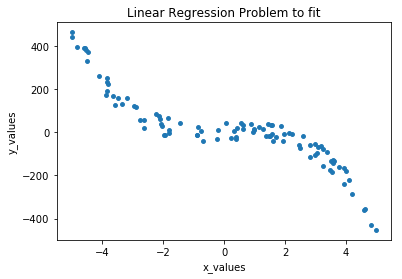

In [41]:
# Presenting generated data
plt.scatter(x_values, y_values, s=15)
plt.title("Linear Regression Problem to fit")
plt.xlabel("x_values")
plt.ylabel("y_values")
plt.show()

### Sklearn solution

In [42]:
# Stacking x values
exp_one_x_values = x_values
exp_two_x_values = x_values ** 2
exp_three_x_values = x_values ** 3
X = np.column_stack((exp_one_x_values, exp_two_x_values, exp_three_x_values))

# Specifying ideal outputs
Y = y_values

In [43]:
# Creating model
linear_regression = linear_model.LinearRegression()

# Training model
linear_regression.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
# Learned coefficients
print("Coefficients intercept:\n " + str(linear_regression.intercept_))
print("Coefficients coef:\n " + str(linear_regression.coef_))

Coefficients intercept:
 [ 7.2257667]
Coefficients coef:
 [[ 5.38632489  0.16208107 -3.94465457]]


In [55]:
# Error - Mean Squared Errors
print("Minimized error value: " + str(np.mean((linear_regression.predict(X) - y_values) ** 2)))

Minimized error value: 758.187283651


In [56]:
def hypothesis(x, intercept, coef):
    return intercept[0] + coef[0][0] * x + coef[0][1] * x ** 2 + coef[0][2] * x ** 3

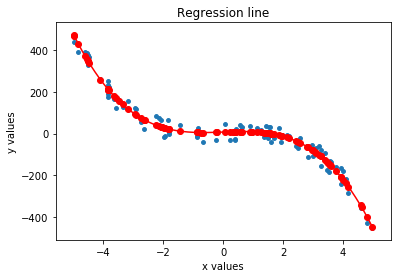

In [57]:
# Displaying dataset
plt.scatter(x_values, y_values, s=15)

# Displaying aproximated function
min_x = np.min(x_values)
max_x = np.max(x_values)
function_x = np.arange(min_x, max_x, 0.01)
function_y = [hypothesis(x, linear_regression.intercept_, linear_regression.coef_) for x in function_x]
plt.plot(function_x, function_y, c="red")

# Displaying predicted values
y_predicted = linear_regression.predict(X)
plt.scatter(x_values, y_predicted, c='red')

plt.title("Regression line")
plt.ylabel("y values")
plt.xlabel("x values")
plt.show()